<a href="https://colab.research.google.com/github/royalseeker/hackbio-biocoding-internship/blob/main/stage-three/Stage3_Plant_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Plant Health Project
This file, ["plant_health_data.csv"](https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/main/Python/Dataset/plant_health_data.csv), contains biosensor data related to plant health monitoring. It includes timestamped measurements of environmental and physiological parameters critical to assessing plant health, such as soil moisture, temperature, humidity, light intensity, nutrient levels, and plant stress signals.
* Is there a time of the day when plants are mostly stressed?
* Do you have suggestions for reducing plant stress
* Build a classification algorithm for detecting stress in plants

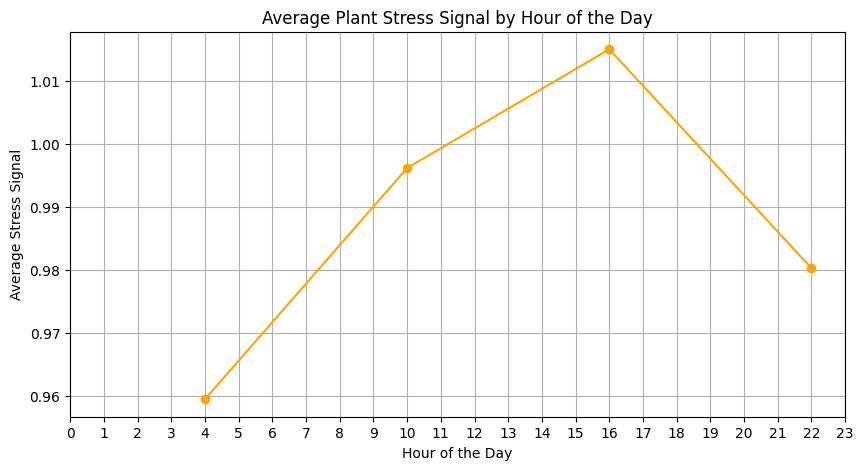

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset from the provided URL
url = 'https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/main/Python/Dataset/plant_health_data.csv'
df = pd.read_csv(url)

# Convert the 'Timestamp' column to a datetime object for easier time-based analysis
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Extract the hour from the timestamp to analyze stress levels at different times of the day
df["hour"] = df["Timestamp"].dt.hour

# Group data by hour and calculate the average electrochemical signal (used as a proxy for stress)
hourly_stress = df.groupby("hour")["Electrochemical_Signal"].mean()

# Plot the variation of plant stress signals across different hours of the day
plt.figure(figsize=(10, 5))
plt.plot(hourly_stress.index, hourly_stress.values, marker='o', linestyle='-', color='orange')

# Set plot title and labels
plt.title('Average Plant Stress Signal by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Stress Signal')

# Ensure x-axis displays all 24 hours for clarity
plt.xticks(range(24))

# Add grid for better readability
plt.grid()

# Show the final plot
plt.show()


**Examine the `hourly_stress` plot:** Look at the chart generated by the `hourly_stress.plot()` command. Identify the hours with the highest average stress signal.

In [13]:
# Find the hours with the highest average stress signal
hours_with_highest_stress = hourly_stress.nlargest(3)  # Get the top 3 hours

print("Hours with the highest average stress signal:")
hours_with_highest_stress

Hours with the highest average stress signal:


,Electrochemical_Signal
hour,
16,1.015065
10,0.996194
22,0.980298


# Build a classification algorithm for detecting stress in plants

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Binarize the 'Electrochemical_Signal' as stress signal (adjust threshold as needed)
df["stress"] = (df["Electrochemical_Signal"] > 0.5).astype(int)

# Features: environmental data + hour (update column names to match the dataset)
features = ["Soil_Moisture", "Ambient_Temperature", "Humidity", "Light_Intensity",
            "Nitrogen_Level", "Phosphorus_Level", "Potassium_Level",
            "Chlorophyll_Content",'Soil_pH'] + ["hour"]

# Ensure there are no missing values in the features
df[features] = df[features].fillna(df[features].mean())

X = df[features]
y = df["stress"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print shapes to verify
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")


Training set shape: (960, 10)
Test set shape: (240, 10)


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

# Predictions on the test data
y_pred = model.predict(X_test_scaled)

# Print classification report to evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.73      0.99      0.84       175

    accuracy                           0.72       240
   macro avg       0.36      0.50      0.42       240
weighted avg       0.53      0.72      0.61       240



Text(0.5, 1.0, 'Feature Importance for Stress Prediction')

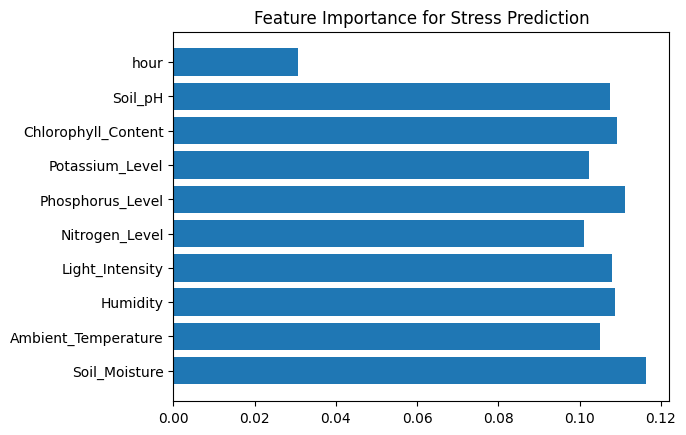

In [51]:
importances = model.feature_importances_
plt.barh(features, importances)
plt.title("Feature Importance for Stress Prediction")

##Do you have suggestions for reducing plant stress

**1. Optimize Watering and Soil Moisture:**

   * **Monitor Soil Moisture:** The code uses `Soil_Moisture` as a feature. Implement a system to monitor soil moisture levels continuously and adjust watering accordingly. Avoid overwatering or underwatering, which can both be stressful for plants.
   * **Automated Watering System:** Consider using an automated watering system that can respond to changes in soil moisture levels.

**2. Manage Temperature:**

   * **Shade during Peak Heat:** Based on your analysis, plants might be experiencing the most stress during the hottest part of the day. Implement shade during those hours, especially if the `Ambient_Temperature` is a significant factor. You can use shade cloths or strategically place plants in areas with natural shade.
   * **Ventilation:** Improve air circulation around the plants. This can help to reduce heat stress and prevent diseases.
   * **Cooling Systems:** In situations with extreme heat, consider using cooling systems like misters or evaporative coolers to help reduce the temperature.

**3. Control Humidity and Light:**

   * **Humidity Control:** Monitor and regulate humidity levels, especially if high or low humidity is found to be a significant stressor based on the model. You can increase humidity by using humidifiers or reduce it by using dehumidifiers.
   * **Light Intensity:** Optimize light intensity, especially if high light intensity is linked to increased stress. You can use shade cloths or adjust the placement of plants to reduce exposure to direct sunlight during peak hours.

**4. Nutrient Management:**

   * **Fertilization:** Pay attention to the levels of `Nitrogen_Level`, `Phosphorus_Level`, and `Potassium_Level`. Monitor these levels and adjust fertilization strategies to ensure the plant has adequate nutrients without creating excess stress.
   * **Nutrient Deficiencies:** Analyze the model to identify if certain nutrient deficiencies are associated with higher stress levels. Ensure the plant has access to the essential nutrients it needs for optimal growth.

**5. Monitor and Address Stressors:**

   * **Monitor Electrochemical Signal:** Continue to monitor the `Electrochemical_Signal` to track changes in plant stress levels. The model can alert you to any deviations from a healthy range.
   * **Intervention:** Take proactive steps to address potential stress factors as soon as they are identified. Implement changes to mitigate the stressors and optimize plant health.

**6. Enhance Model's Insights:**

   * **Feature Importance:** Analyze the `feature_importances_` from your RandomForestClassifier to identify which factors are most important in predicting plant stress. This can help you focus your efforts on the most impactful areas for improving plant health.
   * **Model Refinement:** You can refine the model over time. Add more data, experiment with different algorithms, and include new features to further enhance its accuracy in predicting and mitigating plant stress.


By combining monitoring of environmental factors, observation of electrochemical signals, and targeted interventions, we can develop a strategy to reduce stress in plants and optimize their health.
